[08 线性回归 + 基础优化算法【动手学深度学习v2】](https://www.bilibili.com/video/BV1PX4y1g7KC?spm_id_from=333.999.0.0)

In [1]:
import torch
import random
from d2l import torch as d2l
# 线性回归是最基础的模型
# 线性回归可以看成是一个单层的神经网络

- 基础优化方法
  - 梯度下降
    - 挑选一个初始值$w_0$
    - 重复迭代参数t =1,2,3
    - $$w_t = w_{t-1} -\eta\frac{\partial \iota}{\partial w_{t-1}}$$
    - 沿梯度方向将增加损失函数的值
    - 学习率$\eta$：步长的超参数


- 从0开始实现线性回归
- torch.matmul
  - 是tensor的乘法，输入可以是高维的。当输入是都是二维时，就是普通的矩阵乘法，和tensor.mm函数用法相同。
  - 当输入有多维时，把多出的一维作为batch提出来，其他部分做矩阵乘法。
  - https://blog.csdn.net/qsmx666/article/details/105783610/
- torch.normal(means, std, out=None)
  - 返回一个张量，包含从给定参数means,std的离散正态分布中抽取随机数。

In [2]:
def sys_data(w, b, num_example):
    """生成 y = xw+b+噪声
    x返回的是宽度为len(w)，长为num_example的矩阵，元素按0，1正态分布
    """
    x = torch.normal(0, 1, (num_example, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape(-1, 1)

true_w = torch.tensor([2.0, -3.0, 4.0])
true_b = 4.2
features, labels = sys_data(true_w, true_b, 1000)


In [3]:
features.shape

torch.Size([1000, 3])

In [4]:
# d2l.set_figsize((10,8))
# d2l.plt.scatter(features[:,1].detach().numpy()
# ,labels.detach().numpy(),1)

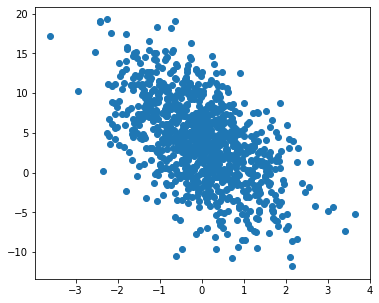

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,5))
plt.scatter(features[:,1],labels)

In [6]:
# 定义一个函数用于接收批量数据大小、特征矩阵和标签向量作为输入
# 生成大小为batch_size的小批量
# 从上一个生成的数据集中，采用迭代器的形式，从features中选出大小为batch_size的数据
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        # 从indices中取出长度为batch_size的数值生成张量
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size,num_examples)])
        # 生成器断点返回
        yield features[batch_indices],labels[batch_indices]
batch_size = 10
for x,y in data_iter(batch_size,features,labels):
    print(x,'\n',y)
    break

tensor([[-0.3055, -0.9541,  1.0471],
        [ 0.8989,  0.2597, -0.1024],
        [ 1.0463, -0.5868,  1.3371],
        [-0.0475, -1.1319,  0.7508],
        [ 0.0891,  0.6820,  0.4406],
        [ 0.8380,  0.0497,  0.3908],
        [ 1.8967,  0.7590,  0.0213],
        [ 0.4864,  1.6178,  1.3699],
        [-0.1933,  0.1574, -0.9975],
        [-0.5580, -1.3126,  1.4124]]) 
 tensor([[10.6197],
        [ 4.7985],
        [13.3938],
        [10.5002],
        [ 4.1013],
        [ 7.2873],
        [ 5.7953],
        [ 5.8051],
        [-0.6503],
        [12.6791]])


In [7]:
# 定义初始化模型
w = torch.normal(0,0.01,size=(3,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
w,b

(tensor([[-0.0019],
         [-0.0298],
         [ 0.0069]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [8]:
# 定义模型
def linreg(x,w,b):
    """线性回归模型"""
    return torch.matmul(x,w)+b

In [9]:
def squares_loss(y_hat,y):
    """均方损失"""
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [10]:
# 定义优化算法
def sgd(params,lr,batch_size):
    """小批量随机梯度下降
    参数更新不需要使用梯度
    """
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()


In [11]:
# 学习率
lr = 0.01
# 数据扫描次数
num_epochs = 10
net = linreg
loss = squares_loss

for epoch in range(num_epochs):
    for x,y in data_iter(batch_size,features,labels):
        # 计算x与y的小批量损失
        l = loss(net(x,w,b),y)
        # 计算损失函数的梯度
        l.sum().backward()
        # 使用参数梯度更新
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')


epoch1,loss3.214520
epoch2,loss0.466328
epoch3,loss0.068035
epoch4,loss0.009982
epoch5,loss0.001508
epoch6,loss0.000268
epoch7,loss0.000084
epoch8,loss0.000058
epoch9,loss0.000054
epoch10,loss0.000053


In [12]:
result = list(zip(net(features,w,b).detach().numpy(),labels.detach().numpy()))
for x,y in result[:10]:
    print(x[0],y[0],abs(x[0]-y[0]))

-0.24744177 -0.2509237 0.0034819245
-3.572102 -3.5517004 0.020401716
-4.1542745 -4.1506243 0.0036501884
1.8578043 1.870824 0.013019681
1.0157125 0.9983094 0.017403126
-7.317166 -7.323821 0.006655216
1.5638156 1.5696548 0.0058392286
6.5121284 6.5327044 0.020576
6.501393 6.497307 0.0040860176
12.690601 12.672278 0.018322945
